### Import libraries

In [2]:
import os
import shutil

import torch
import torch.utils.data
# import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import argparse
import re
import pandas as pd

from helpers import makedir
import model
import push
import train_test_inference as tnt
import save
from log import create_logger
from preprocess import mean, std, preprocess_input_function

### Import some settings

In [3]:
# book keeping namings and code
from settings import base_architecture, img_size, prototype_shape, num_classes, \
                     prototype_activation_function, add_on_layers_type, experiment_run

base_architecture_type = re.match('^[a-z]*', base_architecture).group(0)

model_dir = './saved_models/' + base_architecture + '/' + experiment_run + '/'

### Set up paths

In [ ]:
# From where you want to load the model
model_path = "saved_models/resnet18/001/1nopushAUROC_0.3945_F1_0.3787.pth"

# From where you want to print the prototypes, to show the clinician what the modle looked at
prototype_folder = 'saved_models/resnet18/001/img/epoch-30'

# The path to ecg, on which you want to do inference
path_to_ecg = '../../../data/padmalab_external/special_project/physionet.org/files/ptb-xl/1.0.3/records100_ground_truth/records100_ground_truth_01000/01000_lr-0.png'

### Create the model

In [5]:
# construct the model
base_architecture = 'resnet18'
ppnet = model.construct_PPNet(base_architecture=base_architecture,
                              pretrained=True, img_size=img_size,
                              prototype_shape=prototype_shape,
                              num_classes=num_classes,
                              prototype_activation_function=prototype_activation_function,
                              add_on_layers_type=add_on_layers_type)
ppnet = ppnet.to('cuda')

In [6]:
# Load the model
ppnet.load_state_dict(torch.load(model_path))
ppnet.eval()

/tmp/ipykernel_1900042/3106021021.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ppnet.load_state_dict(torch.load(model_path))


PPNet(
	features: resnet18_features,
	img_size: 224,
	prototype_shape: (20, 128, 1, 1),
	proto_layer_rf_info: [7, 32, 435, 0.5],
	num_classes: 2,
	epsilon: 0.0001
)

### Inference

Predicted class: Normal


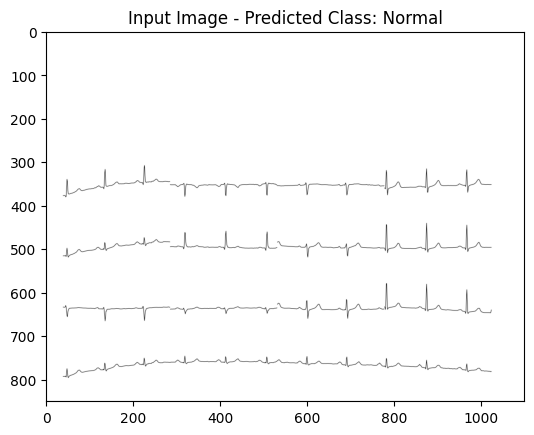

0 10


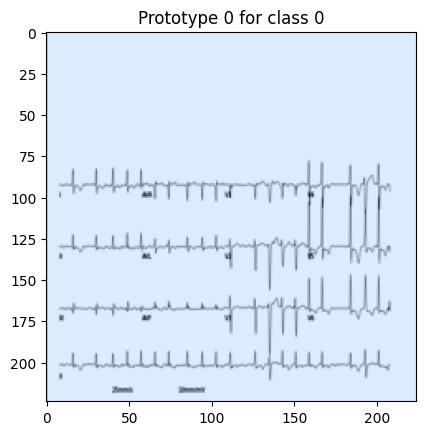

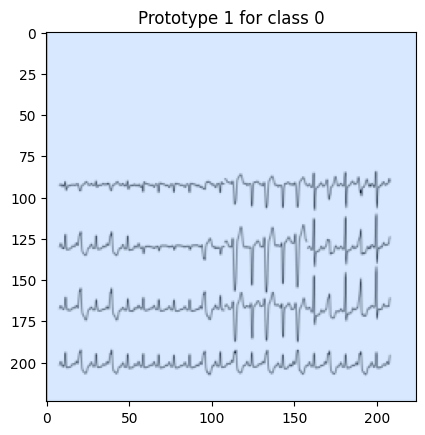

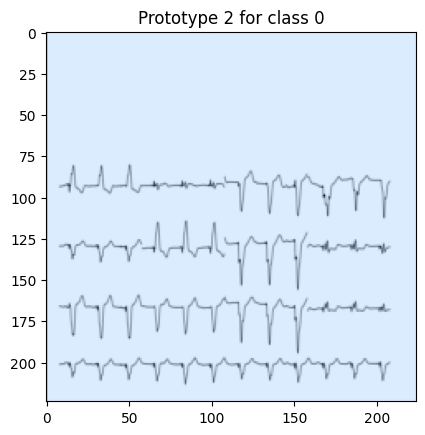

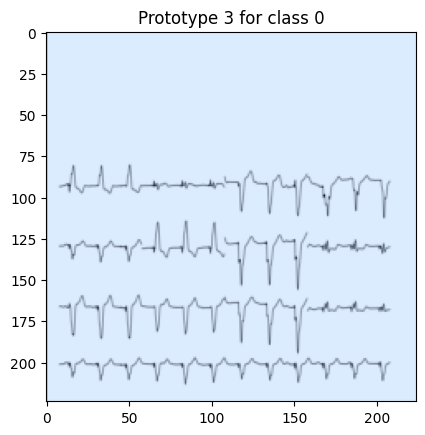

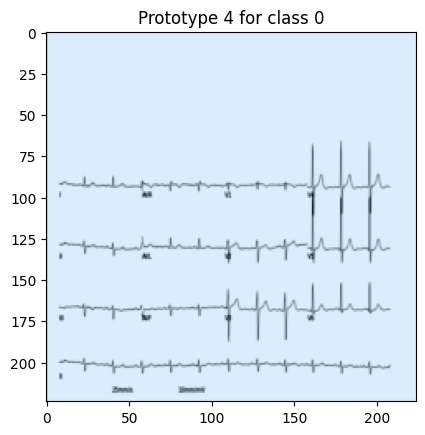

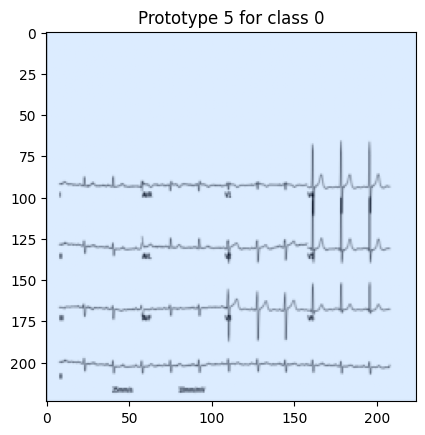

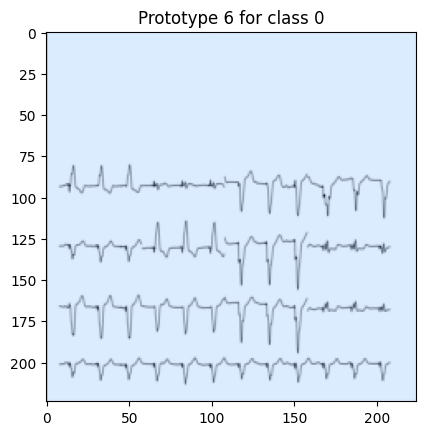

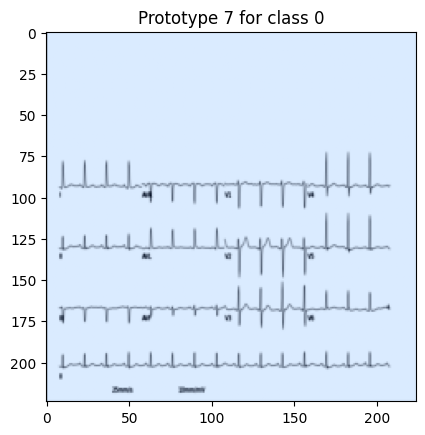

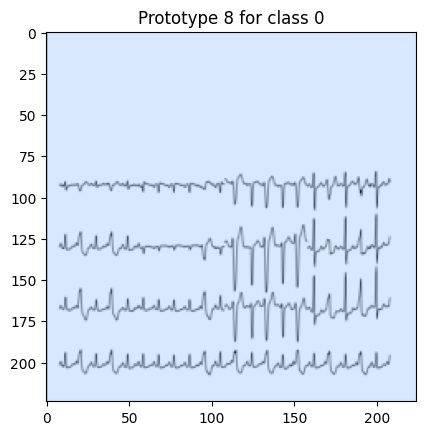

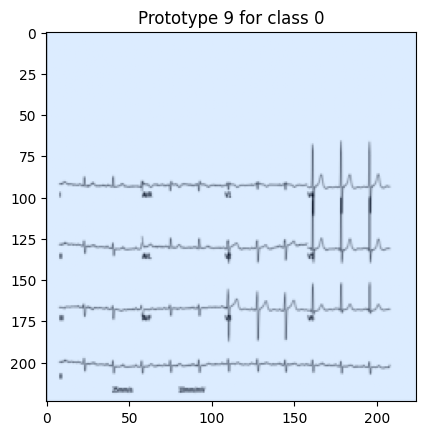

In [9]:
tnt.inference(model=ppnet, example_path=path_to_ecg, prototype_img_folder=prototype_folder) 